<a href="https://colab.research.google.com/github/ShivamG0897/Employee_Turnover_analytics_ANN/blob/main/Employee_Turnover_Analytics_ANN_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('1688640705_hr_comma_sep.xlsx')
df.tail(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [4]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [5]:
X = df.drop(columns = 'left')
X.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium


In [6]:
y = df['left']
y.tail(2)

14997    1
14998    1
Name: left, dtype: int64

In [7]:
sales_dummy = pd.get_dummies(X['sales'], drop_first = True)
salary_dummy = pd.get_dummies(X['salary'], drop_first = True)

In [8]:
X.drop(columns = ['sales','salary'], inplace = True)

In [9]:
# Concatenate the dummay variables with the X dataset
X = pd.concat([X,sales_dummy,salary_dummy], axis = 1)

In [10]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,low,medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,1,0,1,0


In [11]:
# Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 100)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11999, 18), (3000, 18), (11999,), (3000,))

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
# Creating the ANN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (11999, 18)               342       
                                                                 
 dense_1 (Dense)             (11999, 12)               228       
                                                                 
 dropout (Dropout)           (11999, 12)               0         
                                                                 
 dense_2 (Dense)             (11999, 10)               130       
                                                                 
 dropout_1 (Dropout)         (11999, 10)               0         
                                                                 
 dense_3 (Dense)             (11999, 1)                11        
                                                                 
Total params: 711 (2.78 KB)
Trainable params: 711 (2.78 

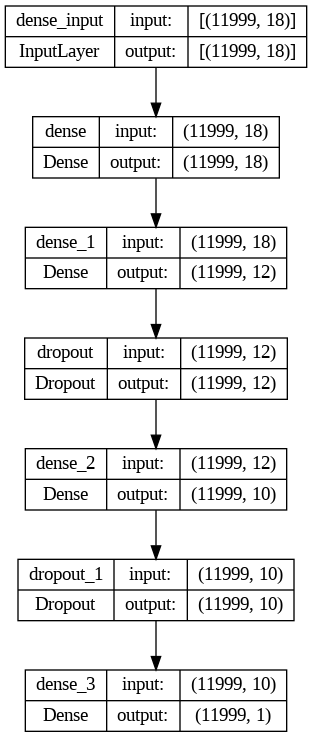

In [15]:
# Initialize the ANN model
model1 = Sequential()

#Add input layer -  when we have 18 features in the training set, we will use 18 input nodes
model1.add(Dense(units = 18, activation = 'relu'))

# Adding first hidden layer [generally need 10-100 neurons per hidden layer]
model1.add(Dense(units = 12, activation = 'relu'))

# Adding dropout to the first hidden layer
model1.add(Dropout(0.3))

# Adding second hidden layer
model1.add(Dense(units = 10, activation = 'relu'))

# Adding dropout to the second hidden layer
model1.add(Dropout(0.4))

# Adding the output layer
model1.add(Dense(units = 1, activation = 'sigmoid'))
# Since it is a regression type problem we use only a single node in the output layer. Same goes for binary class

model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                  loss = tf.keras.losses.binary_crossentropy,
                  metrics = ['accuracy'])

# Build the model
model1.build(input_shape=X_train.shape)

# Print model summary
print(model1.summary())


# Visualize the architecture
plot_model(model1, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [16]:
# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

# Fit the model

model_history = model1.fit(X_train, y_train, epochs=100, validation_split = 0.2, batch_size = 10, callbacks = early_stopping)

Epoch 1/100
960/960 [==============================] - 10s 6ms/step - loss: 0.5011 - accuracy: 0.7615 - val_loss: 0.3400 - val_accuracy: 0.8383
Epoch 2/100
960/960 [==============================] - 8s 8ms/step - loss: 0.3298 - accuracy: 0.8523 - val_loss: 0.2189 - val_accuracy: 0.9371
Epoch 3/100
960/960 [==============================] - 4s 5ms/step - loss: 0.2624 - accuracy: 0.8991 - val_loss: 0.1833 - val_accuracy: 0.9488
Epoch 4/100
960/960 [==============================] - 2s 2ms/step - loss: 0.2311 - accuracy: 0.9241 - val_loss: 0.1651 - val_accuracy: 0.9550
Epoch 5/100
960/960 [==============================] - 3s 3ms/step - loss: 0.2122 - accuracy: 0.9328 - val_loss: 0.1595 - val_accuracy: 0.9567
Epoch 6/100
960/960 [==============================] - 3s 4ms/step - loss: 0.2055 - accuracy: 0.9400 - val_loss: 0.1595 - val_accuracy: 0.9571
Epoch 7/100
960/960 [==============================] - 2s 2ms/step - loss: 0.1841 - accuracy: 0.9492 - val_loss: 0.1521 - val_accuracy: 0.956

In [17]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

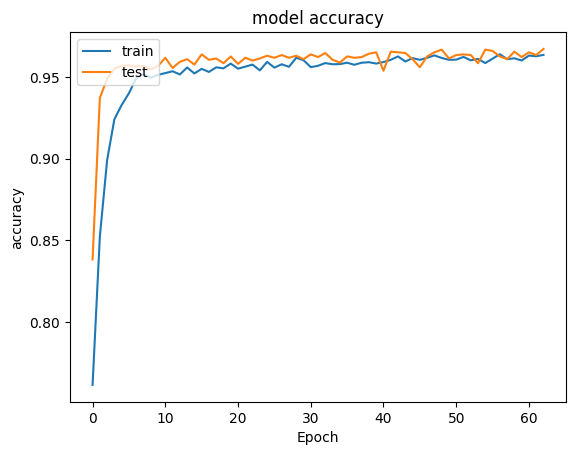

In [18]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

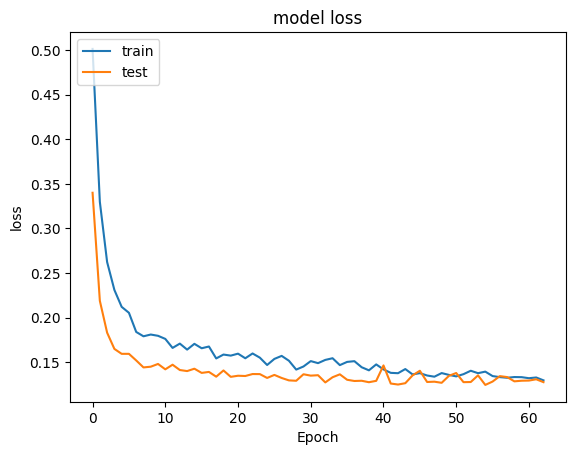

In [19]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [20]:
# Making the predictions and evaluating the model

y_pred = model1.predict(X_test)
y_pred = (y_pred >= 0.5)

94/94 [==============================] - 0s 2ms/step


In [21]:
# Make the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[2217,   33],
       [  64,  686]])

In [23]:
# Calculate the accuracy score
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.9676666666666667

In [24]:
# Get the weights
model1.get_weights()

[array([[ 2.54227102e-01,  2.75626719e-01,  3.62226158e-01,
          2.37112150e-01, -2.85344750e-01, -2.54569024e-01,
         -2.14002892e-01, -1.93498716e-01,  1.51217091e+00,
          6.48020655e-02, -3.06889474e-01, -5.32144964e-01,
          6.11267507e-01,  6.44205287e-02,  2.59765029e-01,
          4.82665300e-01,  2.29268730e-01, -4.46566552e-01],
        [-2.49957055e-01, -2.47242916e-02, -2.03468025e-01,
          5.39632738e-01, -6.36224329e-01, -1.58434361e-01,
         -3.05457950e-01,  3.94244827e-02, -8.08883965e-01,
          3.17061245e-01, -2.82635123e-01, -8.59693810e-03,
          5.33145487e-01,  3.10957521e-01,  5.55605352e-01,
          2.44226724e-01,  1.67766365e-03,  1.57246038e-01],
        [-7.10404634e-01, -6.20001376e-01, -6.74690187e-01,
         -1.52846962e-01, -5.01559436e-01,  6.11501038e-01,
          3.87813926e-01,  4.12409067e-01,  1.21798061e-01,
         -1.80331632e-01, -8.49181652e-01,  8.53001773e-01,
          8.45588326e-01,  1.60009667e